In [1]:
#importing some useful libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In C:\Users\Arthur\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\Arthur\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\Arthur\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\Arthur\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\Arthur\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
#using the yfinance library to get iBovespa data directly
ibov = yf.Ticker("^BVSP")
hist_ib = ibov.history(start = "2015-09-01", end = "2020-09-30", interval = "1mo", auto_adjust = True, actions = False)
hist_ib.describe()

,Open,High,Low,Close,Volume
count,61.000000,61.000000,61.000000,61.000000,6.100000e+01
mean,76460.639344,80584.081967,72847.770492,77255.426230,9.713827e+07
std,20574.665214,21125.127937,19645.741505,20326.674672,4.802419e+07
min,40397.000000,43349.000000,37046.000000,40406.000000,5.193560e+07
25%,61906.000000,65054.000000,58367.000000,62711.000000,6.890940e+07
50%,76403.000000,80589.000000,71935.000000,76678.000000,8.093790e+07
75%,95423.000000,98405.000000,89409.000000,95415.000000,9.807770e+07
max,115652.000000,119593.000000,112825.000000,115645.000000,2.705250e+08


In [3]:
#droping rows of the table where there's no data for the column "Close" 
hist_ib.dropna(axis=0, subset=["Close"], inplace=True)
hist_ib.head(5)

,Open,High,Low,Close,Volume
Date,,,,,
2015-09-01,46625.0,49396.0,43767.0,45059.0,79146200
2015-10-01,45064.0,49752.0,44789.0,45869.0,78617500
2015-11-01,45869.0,49054.0,45106.0,45120.0,66640000
2015-12-01,45121.0,47142.0,43137.0,43350.0,64358600
2016-01-01,43349.0,43349.0,37046.0,40406.0,70039500


In [4]:
#Using yfinance library to get Petrobras historical data for the last 5 years and cleaning it
petr4 = yf.Ticker("PETR4.SA")
hist_p4 = petr4.history(start = "2015-09-01", end = "2020-09-30", interval = "1mo", auto_adjust = True, actions = False)
hist_p4.dropna(axis=0, subset=["Close"], inplace=True)
hist_p4.describe()

,Open,High,Low,Close,Volume
count,61.000000,61.000000,61.000000,61.000000,6.100000e+01
mean,17.360253,19.021843,15.737075,17.397239,1.209225e+09
std,7.179973,7.408172,6.724506,7.002187,4.585854e+08
min,4.397310,4.898270,3.822134,4.490080,6.462295e+08
25%,12.338445,13.256869,11.549897,12.588923,9.239898e+08
50%,16.587321,18.684118,13.971203,16.411060,1.120804e+09
75%,24.606286,26.140544,21.519573,23.725742,1.333739e+09
max,30.177769,31.237690,28.335720,29.775162,2.916373e+09


In [5]:
#Doing the same process with Itaú stock's data
itau = yf.Ticker("ITSA4.SA")
hist_it = itau.history(start = "2015-09-01", end = "2020-09-30", interval = "1mo", auto_adjust = True, actions = False)
hist_it.dropna(axis=0, subset=["Close"], inplace=True)
hist_it.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2020-05-01,8.923685,9.350039,7.773522,8.784872,737770400.0
2020-06-01,8.765042,10.500203,8.685720,9.508682,760397200.0
2020-07-01,9.609696,11.090404,9.579884,10.603460,652457700.0
2020-08-01,10.663087,10.832027,9.371195,9.371195,604518300.0
2020-09-01,9.519766,10.008727,8.771357,8.781336,555076500.0


In [6]:
#building a table with closing prices only
prices = pd.concat([hist_ib['Close'], hist_p4['Close'], hist_it['Close']], axis=1)
prices.columns = ['iBovespa', 'Petrobras', 'Itaú']
prices.describe()

,iBovespa,Petrobras,Itaú
count,61.000000,61.000000,61.000000
mean,77255.426230,17.397239,8.596177
std,20326.674672,7.002187,2.692957
min,40406.000000,4.490080,4.054439
25%,62711.000000,12.588923,6.579468
50%,76678.000000,16.411060,8.681156
75%,95415.000000,23.725742,11.088712
max,115645.000000,29.775162,13.682717


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BCDB208>,
      dtype=object)

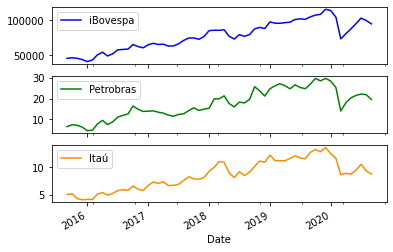

In [7]:
#a quick look in the benchmark and the prices before getting the monthly variation
prices.plot(
    style = ['blue', 'green', 'darkorange'],
    subplots = True
)

In [8]:
#monthly returns
mon_returns = prices.pct_change()
mon_returns.dropna(axis=0, inplace= True)
mon_returns.index.name = ""
mon_returns

,iBovespa,Petrobras,Itaú
,,,
2015-10-01,0.017976,0.140603,0.028221
2015-11-01,-0.016329,-0.035220,-0.173284
2015-12-01,-0.039229,-0.126467,-0.051035
2016-01-01,-0.067912,-0.277612,0.021919
2016-02-01,0.059100,0.061984,-0.008721
2016-03-01,0.169673,0.616732,0.239083
2016-04-01,0.077035,0.231047,0.062823
2016-05-01,-0.100889,-0.214076,-0.093072
2016-06-01,0.063026,0.171642,0.063025


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C059A20>,
      dtype=object)

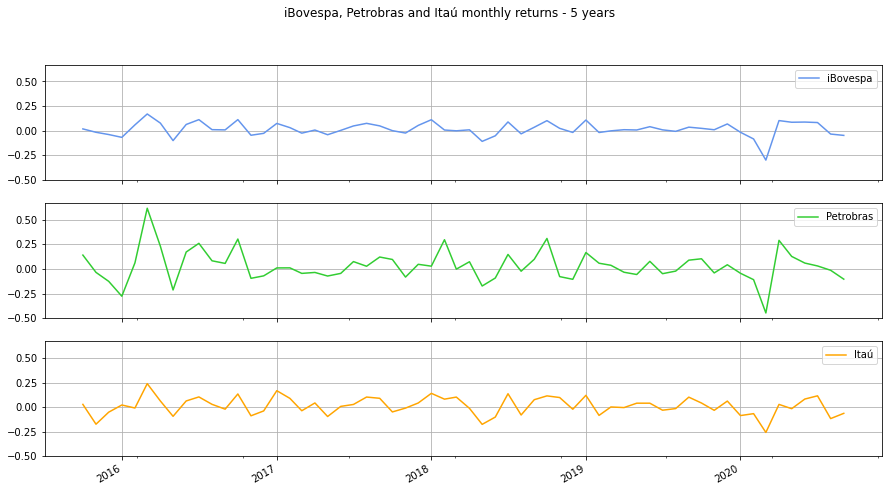

In [9]:
#building some graphics to better understand the data
mon_returns.plot(
    title = 'iBovespa, Petrobras and Itaú monthly returns - 5 years',
    figsize = [15,8],
    style = ['cornflowerblue', 'limegreen', 'orange'],
    grid = True,
    subplots = True,
    sharey = True,
    sharex = True)


AxesSubplot(0.125,0.2;0.775x0.68) AxesSubplot(0.125,0.2;0.775x0.68)


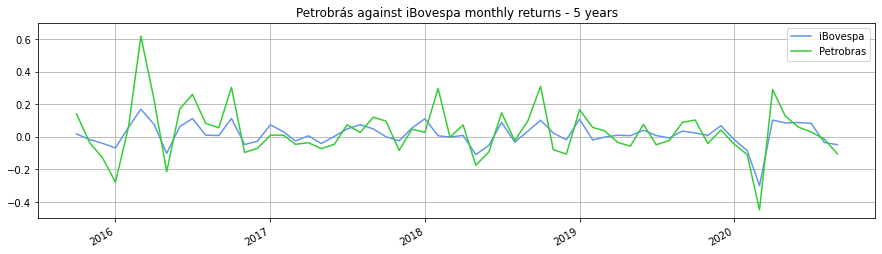

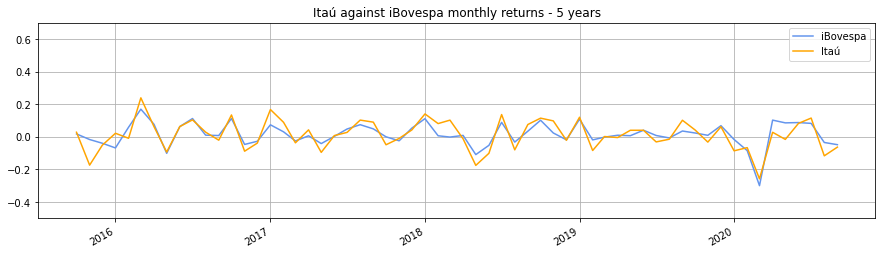

In [10]:
print(mon_returns.plot(y = ['iBovespa', 'Petrobras'],
                      title = "Petrobrás against iBovespa monthly returns - 5 years",
                      style = ['cornflowerblue','limegreen'],
                      grid = True,
                      ylim = (-0.5, 0.7),
                      figsize = [15,4]), 
      mon_returns.plot(y = ['iBovespa', 'Itaú'],
                      title = "Itaú against iBovespa monthly returns - 5 years",
                      style = ['cornflowerblue', 'orange'],
                      grid = True,
                      ylim = (-0.5, 0.7),
                      figsize = [15,4]))

In [11]:
#defining a function to calculate beta
def beta(stock_monthly_returns):
    x = mon_returns['iBovespa']
    y = stock_monthly_returns
    model = stats.linregress(x, y)
    return print(stock_monthly_returns.name, "beta =", "%.2f" % model[0])

In [12]:
#applying the function to calculate Petrobras' beta
beta(mon_returns['Petrobras'])

Petrobras beta = 1.85


In [13]:
#applyting the function to calculate Itaú's beta
beta(mon_returns['Itaú'])

Itaú beta = 1.09
